In [1]:
# import python libraries

import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import sys
import xarray as xr

from matplotlib.dates import DateFormatter
from time import sleep

Select Input Parameters

In [2]:
#Generating inflow for channel 1
comid_all = ['1475119','1475125','1475121','1475141']
inflow1 = pd.DataFrame()
totalinflow = pd.DataFrame()
len(comid_all)
for i in range(len(comid_all)):
    comid = comid_all[i]
    input1 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
    inflow1['Time'] = input1['Time']
    inflow1[i] = input1['Total_inflow']
    
inflow1['Total_inflow'] = inflow1[0]+inflow1[1]+inflow1[2]+inflow1[3]
headerlist = ['Time','1475119','1475125','1475121','1475141','Total_inflow']
totalinflow['Time'] = inflow1['Time']
totalinflow['Inflow_1'] = inflow1['Total_inflow']
inflow1.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow1.csv', header=headerlist)



In [4]:
#Generating inflow for channel 2
comid_all2 = ['1475151','1475149']
inflow2 = pd.DataFrame()
len(comid_all2)
for i in range(len(comid_all2)):
    comid = comid_all2[i]
    input2 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
    inflow2['Time'] = input1['Time']
    inflow2[i] = input2['Total_inflow']
    
inflow2['Total_inflow'] = inflow2[0]+inflow2[1]
headerlist = ['Time','1475151','147149','Total_inflow']
totalinflow['Inflow_2'] = inflow2['Total_inflow']
inflow2.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow2.csv', header=headerlist)

In [6]:
#Generating inflow for channel 3
comid = 1475173
inflow3 = pd.DataFrame()
input3 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
inflow3['Time'] = input3['Time']
inflow3['Total_inflow'] = input3['Total_inflow']
totalinflow['Inflow_3'] = inflow3['Total_inflow']
inflow3.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow3.csv')
totalinflow.to_csv(r'D:/Sujana/Project/ce397/csv_project/Total_inflow.csv')

In [1]:
K1 = 7.722
X1 = 0.25
delta_t = 60
alpha1 = (delta_t-2*K1*X1)/(2*K1*(1-X1)+delta_t)
beta1 = (delta_t+2*K1*X1)/(2*K1*(1-X1)+delta_t)
xi1 = (2*K1*(1-X1)-delta_t)/(2*K1*(1-X1)+delta_t)

K2 = 7.3317
X2 = 0.25
delta_t = 60
alpha2 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta2 = (delta_t+2*K1*X1)/(2*K2*(1-X2)+delta_t)
xi2 = (2*K2*(1-X1)-delta_t)/(2*K2*(1-X2)+delta_t)

K3 = 7.722
X3 = 0.25
delta_t = 60
alpha3 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta3 = (delta_t+2*K2*X2)/(2*K2*(1-X2)+delta_t)
xi3 = (2*K2*(1-X2)-delta_t)/(2*K2*(1-X2)+delta_t)






In [2]:
#Define the matrices
import numpy as np
import pandas as pd
B_I = np.array([0,0,0,0,0,0,beta1,beta2,0]).reshape(3,3)
X_I = np.array([0,0,0,0,0,0,xi1,xi2,0]).reshape(3,3)
B_O = np.array([beta1,0,0,0,beta2,0,alpha3*beta1,alpha3*beta2,beta3]).reshape(3,3)
X_O = np.array([xi1,0,0,0,xi2,0,alpha3*xi1,alpha3*xi2,xi3]).reshape(3,3)
P_I = np.array([1,0,0,0,1,0,alpha1,alpha2,1]).reshape(3,3)
P_O = np.array([alpha1,0,0,0,alpha2,0,alpha3*alpha1,alpha3*alpha2,alpha3]).reshape(3,3)

In [3]:
df = pd.read_csv('Total_inflow.csv')

mat_6x6 = np.block([[B_I,X_I],[B_O,X_O]])  # Creating 6x6 Matrix

mat_6x3 = np.block([[P_I],[P_O]])        # Creating 6 * 3 matrix

I_intial=np.array([0,0,0]).reshape(3,1)  # Intializing I matrix

O_intial=np.array([0,0,0]).reshape(3,1)    # Initializing O matrix

IO_mat_6x1 = np.block([[I_intial],[O_intial]])  # Creating a block matrix

In [4]:
P1 = np.array(df['Inflow_1'])
P2 = np.array(df['Inflow_2'])
P3 = np.array(df['Inflow_3'])

# P_t = np.array([[P1[0]],[P2[0]],[P3[0]]])

result = IO_mat_6x1.reshape(1,6) # Initialing result with initial value for Input and output

for idx in range(len(P1)):   # running till the length of P1 i.e. the number of time steps
    P_t = np.array([[P1[idx]],[P2[idx]],[P3[idx]]])   # extracting value of each arrary for each time step
    val = mat_6x6@result[-1,:].reshape(6,1)+mat_6x3@P_t    # selecting the last value of result and reshaping it to 6x1
    val = val.reshape(1,6)
    result = np.concatenate((result,val),axis=0)    # each row result for each time step

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.90509980e-01,  2.04396995e+00,  2.43389869e+00,
         6.19957808e-01,  1.62182089e+00,  1.93121613e+00],
       [ 5.45849986e-01,  8.51789978e-01,  2.27490331e+00,
         7.13992610e-01,  1.39500070e+00,  2.65469233e+00],
       [ 4.82339988e-01,  4.38749989e-01,  6.95089112e-01,
         3.82314660e-01,  1.51474456e-01,  7.59244215e-01],
       [ 4.80229988e-01,  2.92479993e-01,  1.22368294e+00,
         5.48339918e-01,  5.22173024e-01,  1.07023060e+00],
       [ 4.80069988e-01,  2.36009994e-01,  6.68269563e-01,
         4.34036608e-01,  8.99429588e-02,  8.88893922e-01],
       [ 4.79929988e-01,  2.26109994e-01,  9.76984791e-01,
         5.11096051e-01,  3.29618744e-01,  7.60949886e-01],
       [ 4.79779988e-01,  2.23979994e-01,  7.42212144e-01,
         4.58732383e-01,  1.53599764e-01,  9.39807764e-01],
       [ 4.79629988e-01,  2.23799994e-01,  8.927

In [8]:
print(result.reshape(len(P1)+1,6))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.90509980e-01  2.04396995e+00  2.43389869e+00  6.19957808e-01
   1.62182089e+00  1.93121613e+00]
 [ 5.45849986e-01  8.51789978e-01  2.27490331e+00  7.13992610e-01
   1.39500070e+00  2.65469233e+00]
 [ 4.82339988e-01  4.38749989e-01  6.95089112e-01  3.82314660e-01
   1.51474456e-01  7.59244215e-01]
 [ 4.80229988e-01  2.92479993e-01  1.22368294e+00  5.48339918e-01
   5.22173024e-01  1.07023060e+00]
 [ 4.80069988e-01  2.36009994e-01  6.68269563e-01  4.34036608e-01
   8.99429588e-02  8.88893922e-01]
 [ 4.79929988e-01  2.26109994e-01  9.76984791e-01  5.11096051e-01
   3.29618744e-01  7.60949886e-01]
 [ 4.79779988e-01  2.23979994e-01  7.42212144e-01  4.58732383e-01
   1.53599764e-01  9.39807764e-01]
 [ 4.79629988e-01  2.23799994e-01  8.92737633e-01  4.93898438e-01
   2.73029197e-01  7.25268686e-01]
 [ 4.79459988e-01  2.23669994e-01  7.82189874e-01  4.69845833e-01
   1.90334045e-01  9.2060

In [8]:

# I(t+delt) = B_I@I(t)+X_I@O(t)+P_I@*P(t+delt)
#ot+i = bo_x_o*ot+p_o*pt+i
P = []
P[0] = df['Inflow_1']
P[1] = df['Inflow_2']
P[2] = df['Inflow_3']

# P = []
# P[0] = df['Inflow_1']
# P[1] = df['Inflow_2']
# P[2] = df['Inflow_3']


IndexError: list assignment index out of range

In [ ]:
n = 100
delta_x = 10 #m
u = 1 #m/s
D = 1 #m/s2
delta_t = 1
c = np.zeros( (100,1))
c[0]=1
alpha_explicit = (D+u*delta_x)*(delta_t/(delta_x**2))
beta_explicit = 1-((delta_t*(2*D+u*delta_x)/(delta_x**2)))
gamma_explicit = (D*delta_t/delta_x**2)
a_explicit = np.zeros( (100,100))
np.fill_diagonal(a_explicit, beta_explicit)
rng = np.arange(99)
a_explicit[rng,rng-1] = alpha_explicit
a_explicit[rng, rng+1] = gamma_explicit

c_explicit = np.zeros([100,2000])
for i in range(0,2000):
    mat_mul = a_explicit@c
    # mat[0:99,i-1] = mat_mul
    # mat[0:99,i-1] = mat_mul[0:99,0]
    c_explicit[:,i-1] = mat_mul[:,0]
    c = mat_mul

In [ ]:
# plot the discharge time series
plt.figure(facecolor='white')
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(nwm_timeseries_df, color='tab:blue', label='Q')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title=f'COMID {comid} from ' \
       f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
       f'{pd.to_datetime(enddate).strftime("%b %d %Y")}')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
plt.savefig('D:/Sujana/Project/Discharge_Graph/' + str(comid)+'_Discharge_graph.jpg')

In [20]:
#Import file for Rating Curve
import pickle
rating_curves = pickle.load( open( "D:/Sujana/Project/rating_curves_dict.p", "rb" ) )

In [21]:
# Get relevant rating curve for specific stream
rc120402 = rating_curves['120402']

In [22]:
# Get the rating curve for the specific stream in this huc6.
rating_curve_gage = rc120402[rc120402['CatchId']==1479611]

In [23]:
#View rating curve data
rating_curve_gage

,CatchId,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
107319,1479611,0.0000,8910,8.180340e+05,8.180341e+05,-1.948000e-03,0.00001,9.39,25.8912,0.05,87.117573,87.117582,-2.074547e-07,-2.381319e-09,NaN
107320,1479611,0.3048,42150,3.870203e+06,3.870234e+06,6.328104e+05,0.00001,9.39,25.8912,0.05,412.162221,412.165517,6.739194e+01,1.635070e-01,1.274468
107321,1479611,0.6096,60932,5.594748e+06,5.594849e+06,2.077490e+06,0.00001,9.39,25.8912,0.05,595.819857,595.830558,2.212449e+02,3.713219e-01,7.228868
107322,1479611,0.9144,98043,9.001942e+06,9.002141e+06,4.386397e+06,0.00001,9.39,25.8912,0.05,958.673240,958.694470,4.671349e+02,4.872615e-01,18.294214
107323,1479611,1.2192,118903,1.091706e+07,1.091736e+07,7.452811e+06,0.00001,9.39,25.8912,0.05,1162.626426,1162.658284,7.936966e+02,6.826569e-01,38.918209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107397,1479611,23.7744,281966,2.588750e+07,2.588829e+07,5.757903e+08,0.00001,9.39,25.8912,0.05,2756.922611,2757.006775,6.131952e+04,2.224134e+01,30671.573284
107398,1479611,24.0792,281966,2.588750e+07,2.588829e+07,5.836808e+08,0.00001,9.39,25.8912,0.05,2756.922611,2757.006775,6.215983e+04,2.254613e+01,31375.296518
107399,1479611,24.3840,281966,2.588750e+07,2.588829e+07,5.915713e+08,0.00001,9.39,25.8912,0.05,2756.922611,2757.006775,6.300014e+04,2.285092e+01,32085.390753
107400,1479611,24.6888,281966,2.588750e+07,2.588829e+07,5.994619e+08,0.00001,9.39,25.8912,0.05,2756.922611,2757.006775,6.384045e+04,2.315571e+01,32801.827534


In [24]:
rating_curve_gage.to_csv('D:/Sujana/Project/ce397/csv_project/rating curve details.csv')

In [24]:
def interpolate_stage(discharge_difference, rating_curves):
    """
    interpolates the stage height for the nwm discharge for each comid

    Parameters:
    ---------
    nwm_discharge : float or list
        the nwm discharge value that we're looking to interpolate
        could be a list of values
    catch_id : string
        a list of discharge values
    stage_list : list
        the corresponding list of stage values

    Returns
    ---------
    interp_val : float or list
        interpolated values for the nwm_discharge
    """
    interpolated_stage = list()
    for idx, discharge in discharge_difference['Discharge_NWM'].iteritems():
        # huc6 = discharge_difference.loc[idx, 'huc6']  # get huc6 code
        # comid = discharge_difference.loc[idx, 'Comid']  # get Comids
        # huc6_rating_curves = rating_curves[str(huc6)]  # find rating curve
        # catch_rating_curve = huc6_rating_curves[huc6_rating_curves['CatchId'] == comid]
        discharge_list = list(rating_curve_gage['Discharge (m3s-1)'])
        stage_list = list(rating_curve_gage['Stage'])
        y_interp = interp1d(discharge_list, stage_list, fill_value='extrapolate')
        interpolated_stage.append(float(y_interp(discharge)))
    return interpolated_stage

C:\Software\Anaconda\Temp/ipykernel_55936/1834111195.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(facecolor='white')


<Figure size 432x288 with 0 Axes>

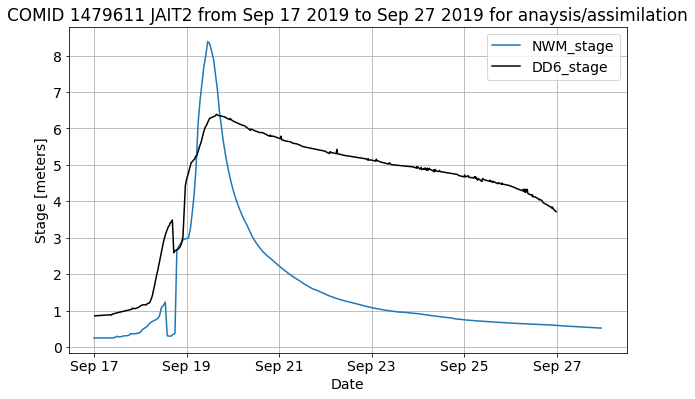

<Figure size 432x288 with 0 Axes>

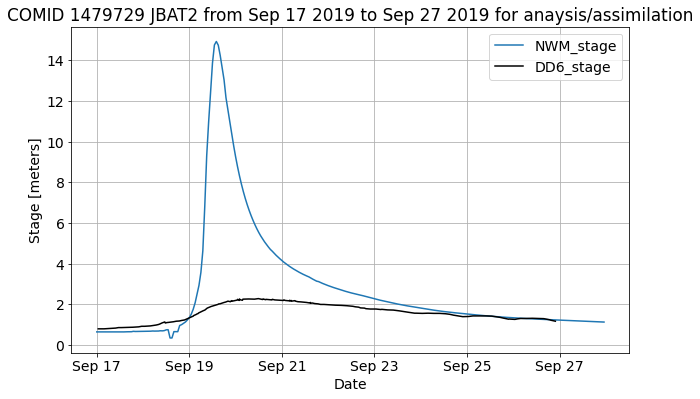

<Figure size 432x288 with 0 Axes>

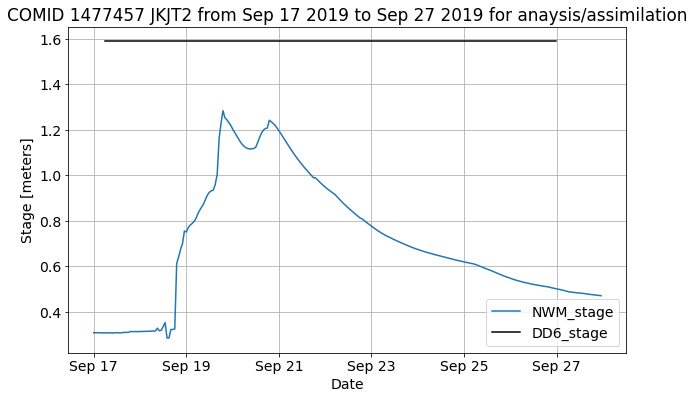

<Figure size 432x288 with 0 Axes>

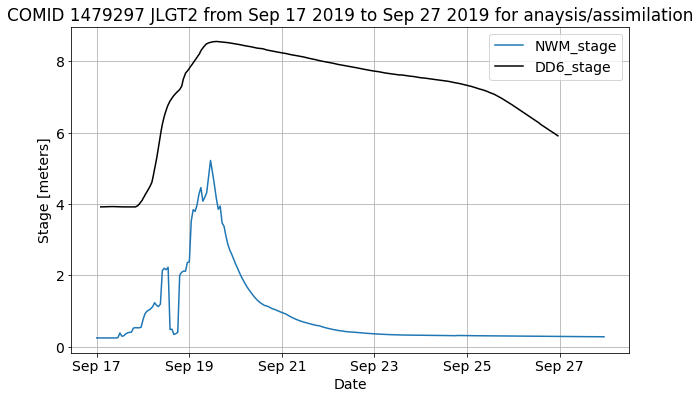

<Figure size 432x288 with 0 Axes>

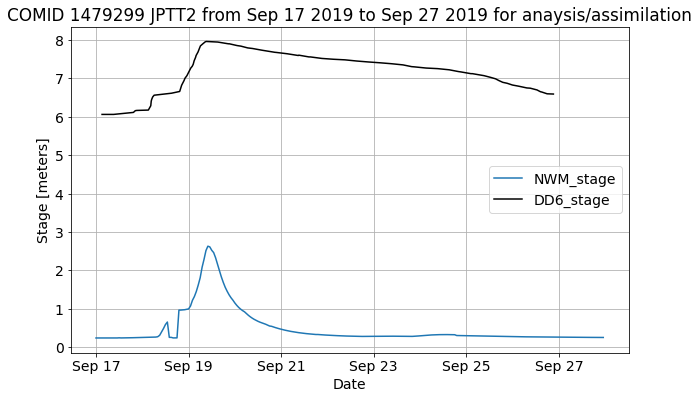

<Figure size 432x288 with 0 Axes>

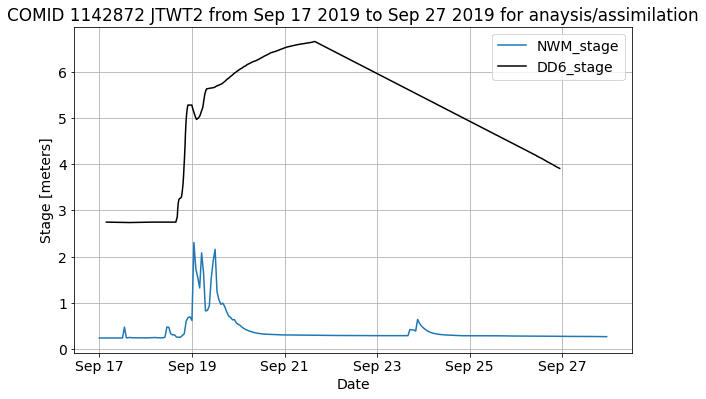

<Figure size 432x288 with 0 Axes>

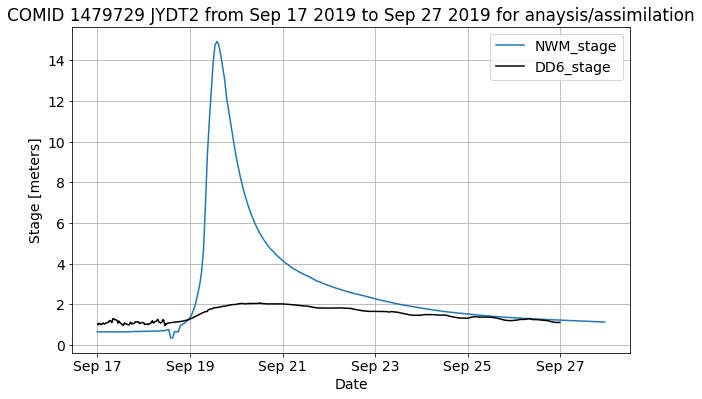

<Figure size 432x288 with 0 Axes>

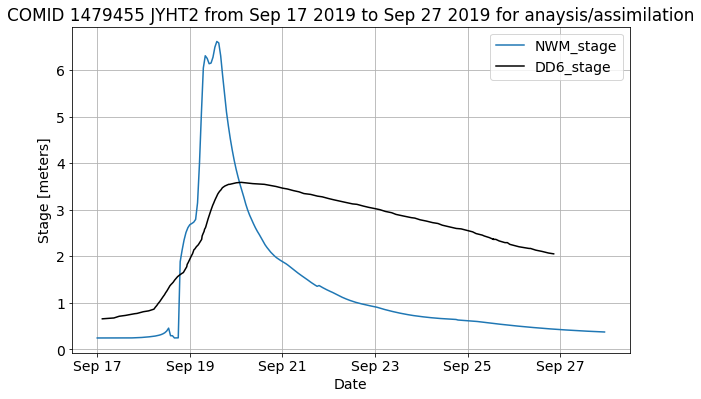

<Figure size 432x288 with 0 Axes>

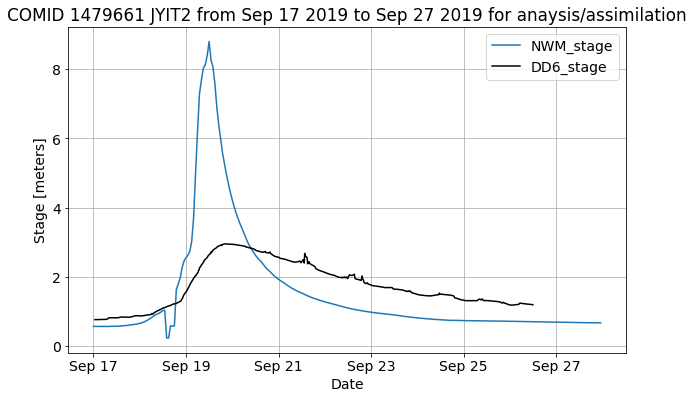

<Figure size 432x288 with 0 Axes>

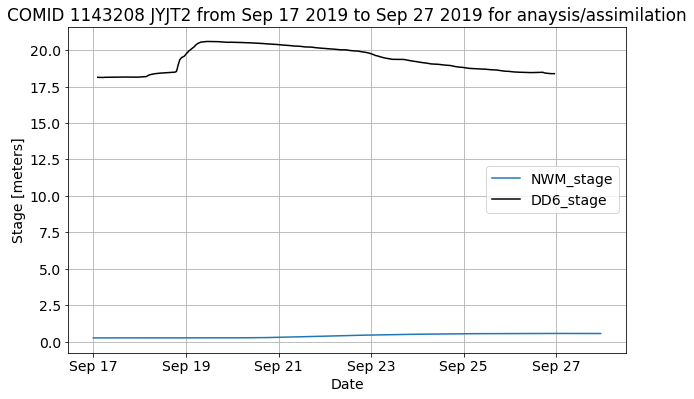

<Figure size 432x288 with 0 Axes>

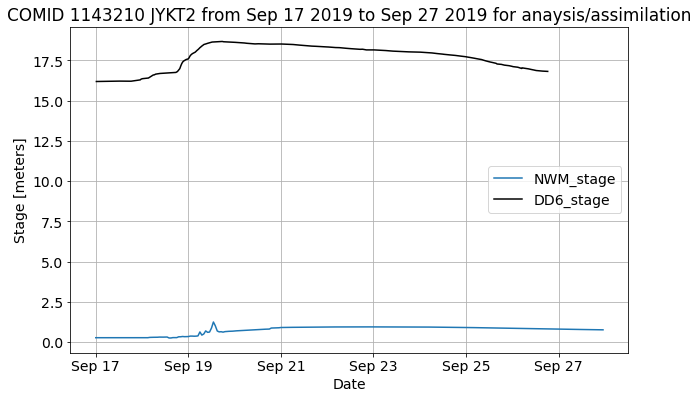

<Figure size 432x288 with 0 Axes>

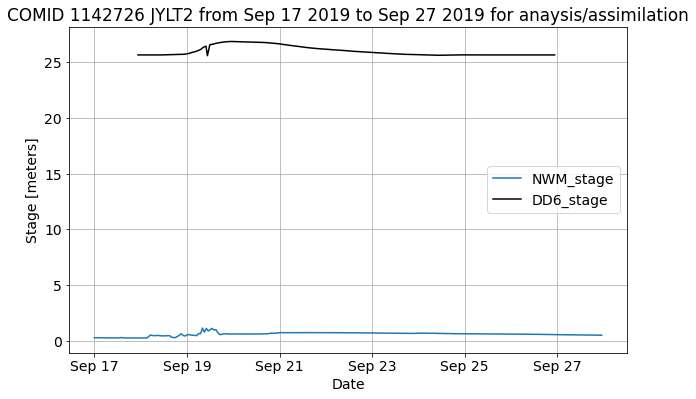

<Figure size 432x288 with 0 Axes>

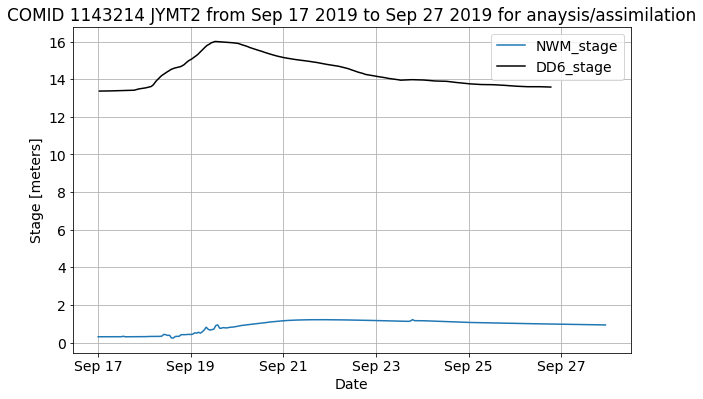

<Figure size 432x288 with 0 Axes>

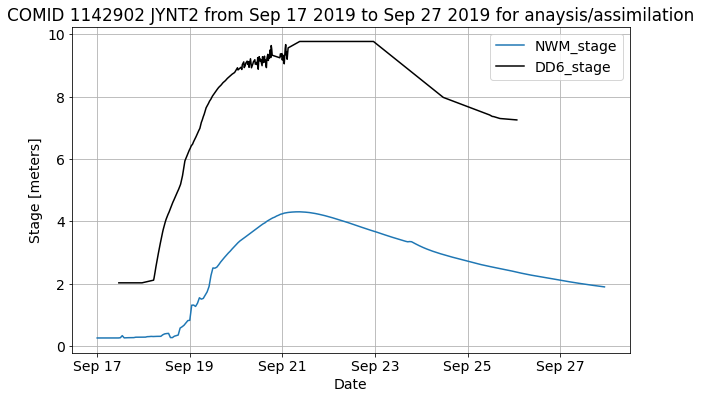

<Figure size 432x288 with 0 Axes>

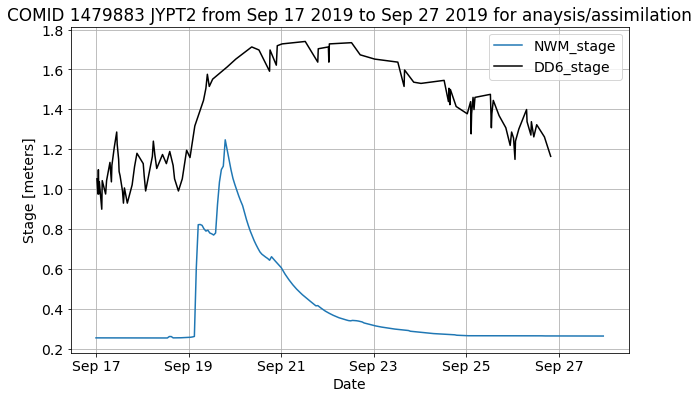

<Figure size 432x288 with 0 Axes>

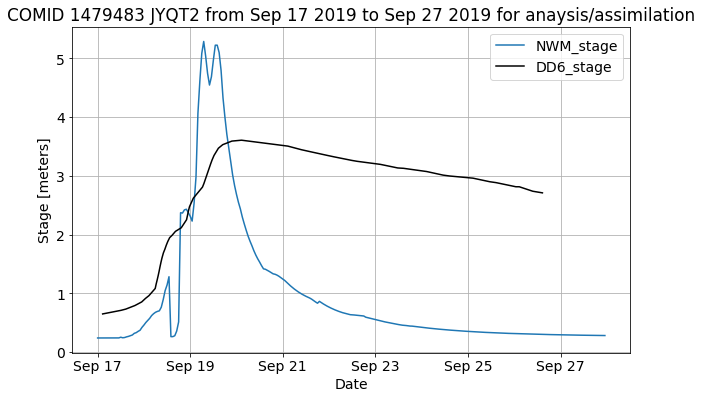

<Figure size 432x288 with 0 Axes>

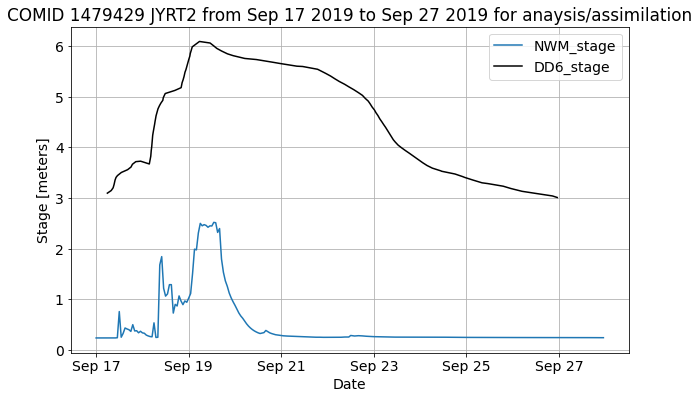

<Figure size 432x288 with 0 Axes>

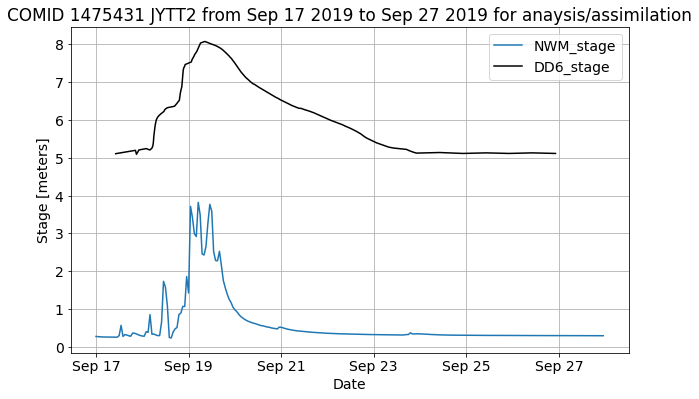

<Figure size 432x288 with 0 Axes>

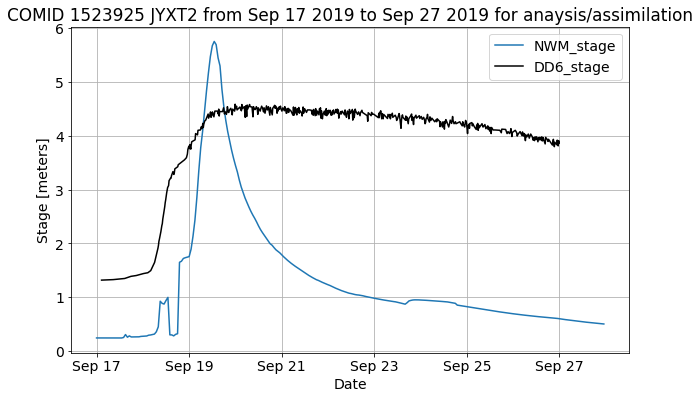

<Figure size 432x288 with 0 Axes>

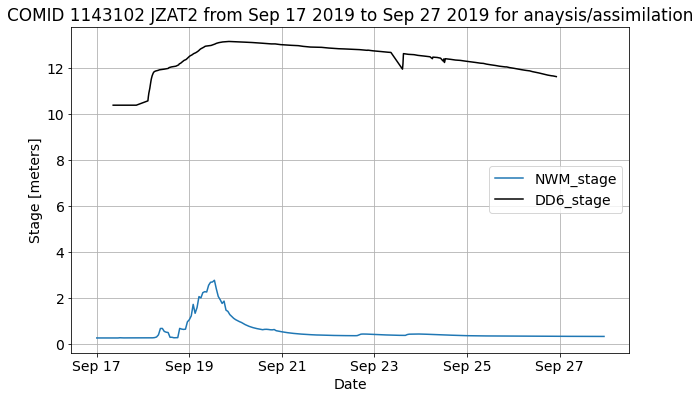

<Figure size 432x288 with 0 Axes>

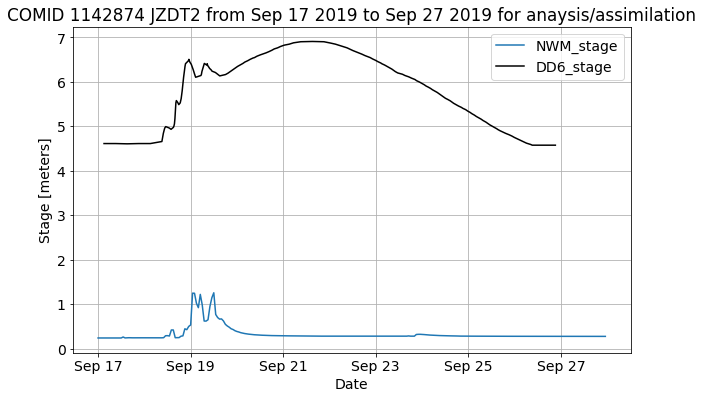

<Figure size 432x288 with 0 Axes>

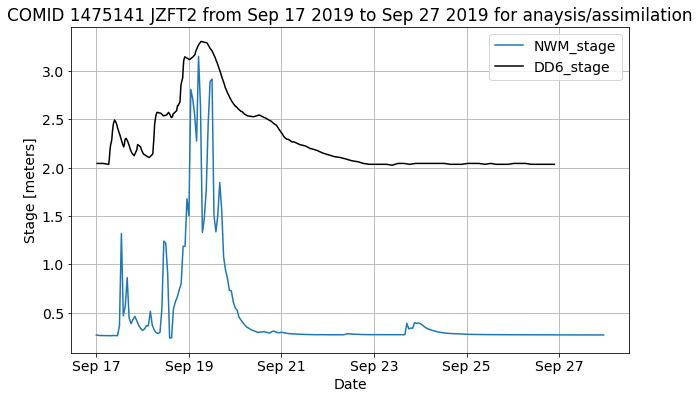

<Figure size 432x288 with 0 Axes>

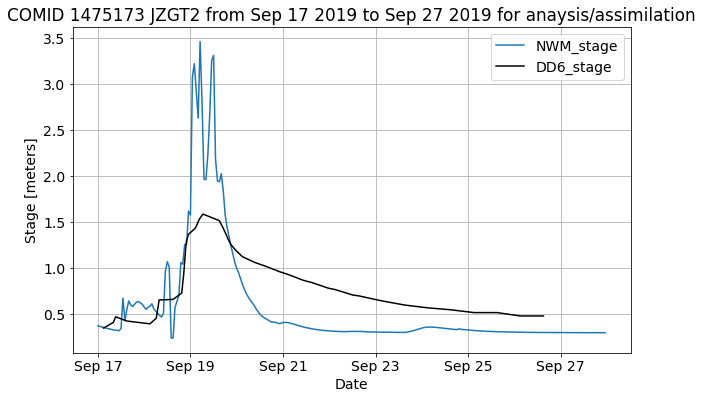

<Figure size 432x288 with 0 Axes>

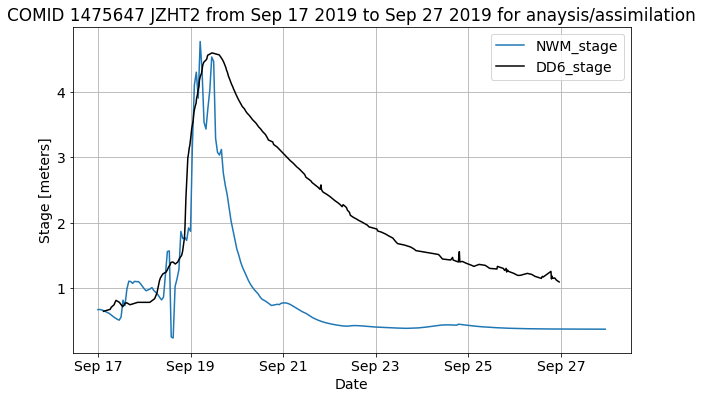

<Figure size 432x288 with 0 Axes>

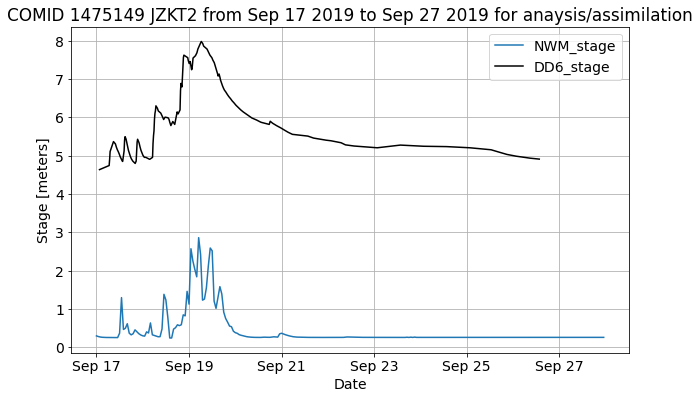

<Figure size 432x288 with 0 Axes>

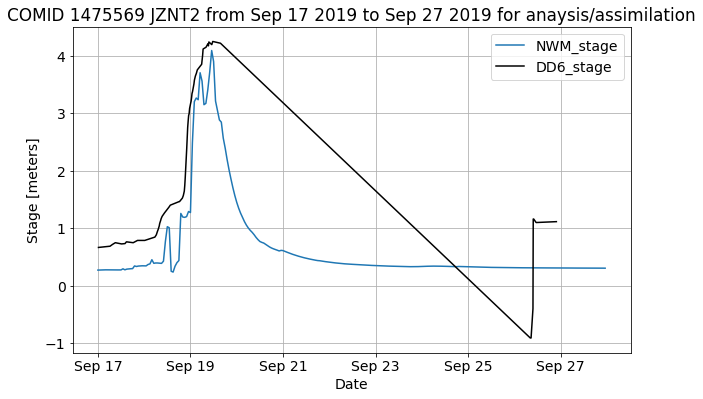

<Figure size 432x288 with 0 Axes>

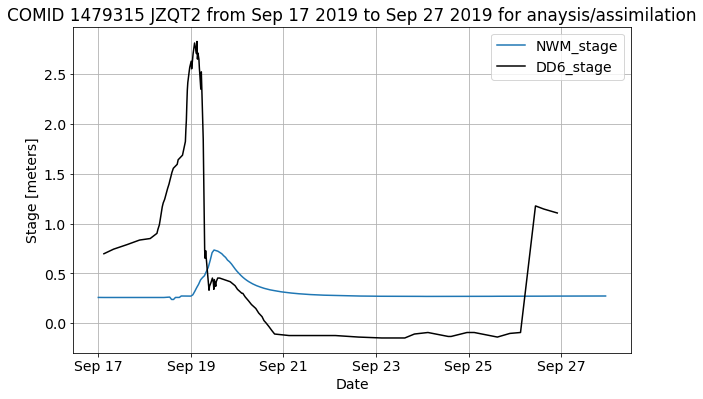

<Figure size 432x288 with 0 Axes>

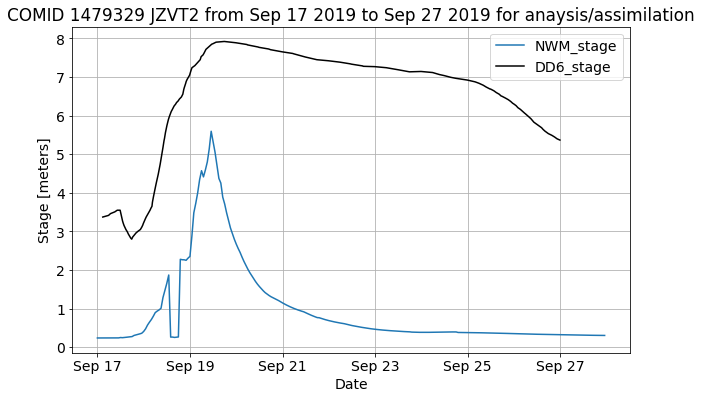

<Figure size 432x288 with 0 Axes>

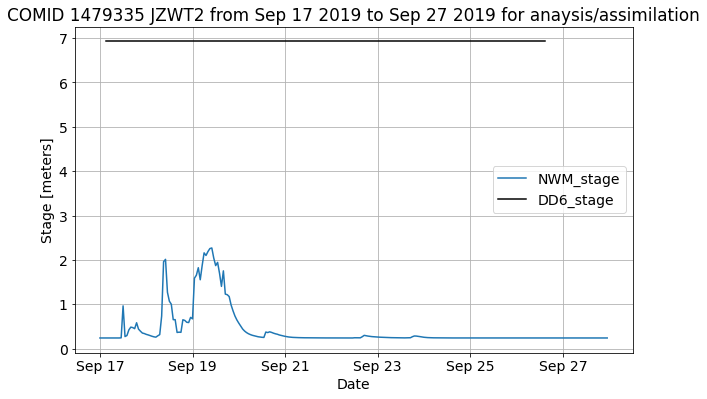

<Figure size 432x288 with 0 Axes>

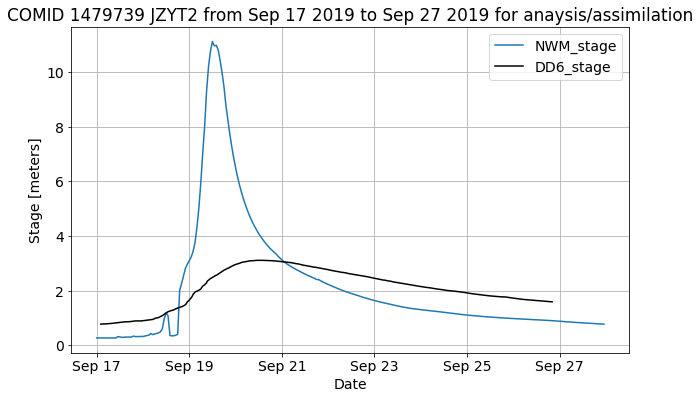

In [25]:
# Interpolation to convert NWM discharge to stage
import json
import pandas as pd

discharge_difference = pd.read_csv('D:/Sujana/Project/NWM_discharge/discharge_'+str(comid)+'.csv')
from scipy.interpolate import interp1d

 
# Get the interpolated stage from rating curves
index = comid_stn['Index']
gauge_name_all = comid_stn['station']


for i in index:
  comid = comid_all[i]
  gauge_name = gauge_name_all[i]
  discharge_difference = pd.read_csv('D:/Sujana/Project/NWM_discharge/discharge_'+str(comid)+'.csv')
  discharge_difference['interp_nwm_stage'] = interpolate_stage(discharge_difference, rating_curves)
  discharge_difference['nwm_stage_ft'] = discharge_difference['interp_nwm_stage'] * 3.28084
  discharge_difference['Time']=pd.to_datetime(discharge_difference['Time'])

    # drop meaningless columns
  # discharge_difference = discharge_difference.drop(columns=['Unnamed: 0'])

      # drop duplicate rows
  # discharge_difference = discharge_difference.drop_duplicates()

      # save as csv
  discharge_difference.to_csv(r'D:/Sujana/Project/all_in_one/NWM_discharge_with_stage/an/'+str(comid)+'_with_stage.csv', index=False)

  
# Read the json files for DD6 data
  gauge_name = gauge_name_all[i]
  file = open("D:/Sujana/Project/Data_final/"+ gauge_name+".json") #Data stored for DD6 gauges
  obj = json.load(file)

  data = obj['locations'][0]['timeseries'][0]['data']
  cols = obj['locations'][0]['timeseries'][0]['columns'].split(',')

  dd6_df = pd.DataFrame(data=data,columns=cols)
  dd6_df['timestamp']=pd.to_datetime(dd6_df['timestamp'])






# Plotting stage-time series
  plt.figure(facecolor='white')
  plt.rc('font', size=14)
  fig, ax = plt.subplots(figsize=(10, 6))
  # time = discharge_difference['Time']
          # print (time)
  ax.plot(discharge_difference['Time'], discharge_difference['interp_nwm_stage'],color='tab:blue', label='NWM_stage')
  dd6_df['dd6_stage_m'] = dd6_df['value']/3.28084
  ax.plot(dd6_df['timestamp'],dd6_df['dd6_stage_m'],'-k',label='DD6_stage')
  ax.set(xlabel='Date',
          ylabel='Stage [meters]',
          title=f'COMID {comid} {gauge_name} from ' \
          f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
          f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for anaysis/assimilation')
  date_form = DateFormatter("%b %d")
  ax.xaxis.set_major_formatter(date_form)
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
  ax.legend()
  ax.grid(True)
  plt.savefig('D:/Sujana/Project/all_in_one/Graphs/save/'+str (comid)+' Station '+gauge_name+'_Stage_graph_AnalysisAssim.jpg')
  

In [26]:
def interpolate_discharge(stage_difference, rating_curves):
    """
    interpolates the discharge for the DD6 gage for each comid

    Parameters:
    ---------
    nwm_discharge : float or list
        the nwm discharge value that we're looking to interpolate
        could be a list of values
    catch_id : string
        a list of discharge values
    stage_list : list
        the corresponding list of stage values

    Returns
    ---------
    interp_val : float or list
        interpolated values for the nwm_discharge
    """
    interpolated_discharge = list()
    for idx, stage in stage_difference['dd6_stage_m'].iteritems():
        # huc6 = discharge_difference.loc[idx, 'huc6']  # get huc6 code
        # comid = discharge_difference.loc[idx, 'Comid']  # get Comids
        # huc6_rating_curves = rating_curves[str(huc6)]  # find rating curve
        # catch_rating_curve = huc6_rating_curves[huc6_rating_curves['CatchId'] == comid]
        discharge_list = list(rating_curve_gage['Discharge (m3s-1)'])
        stage_list = list(rating_curve_gage['Stage'])
        y_interp = interp1d(stage_list, discharge_list, fill_value='extrapolate')
        interpolated_discharge.append(float(y_interp(stage)))
    return interpolated_discharge

C:\Software\Anaconda\Temp/ipykernel_55936/3144538850.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(facecolor='white')


<Figure size 432x288 with 0 Axes>

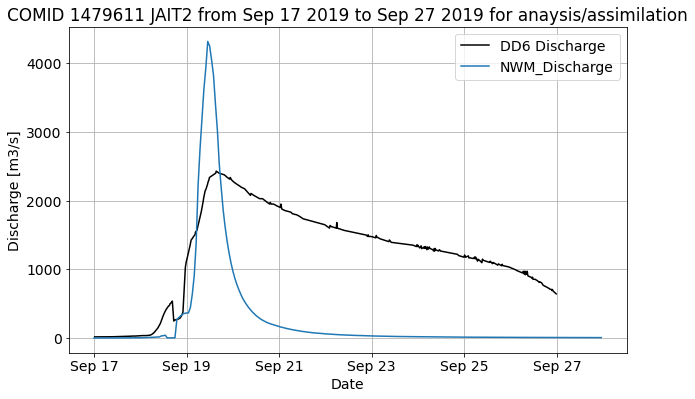

<Figure size 432x288 with 0 Axes>

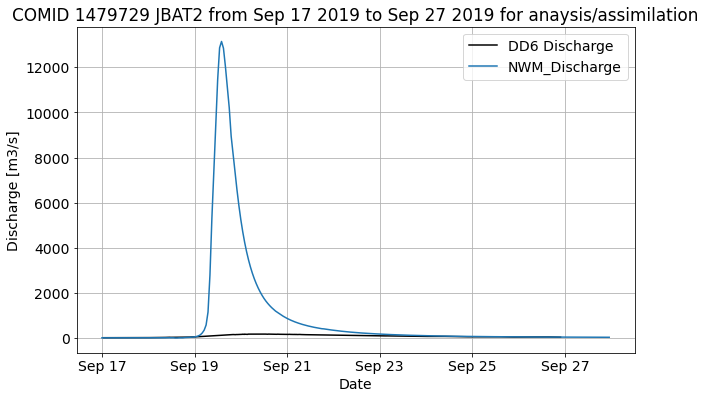

<Figure size 432x288 with 0 Axes>

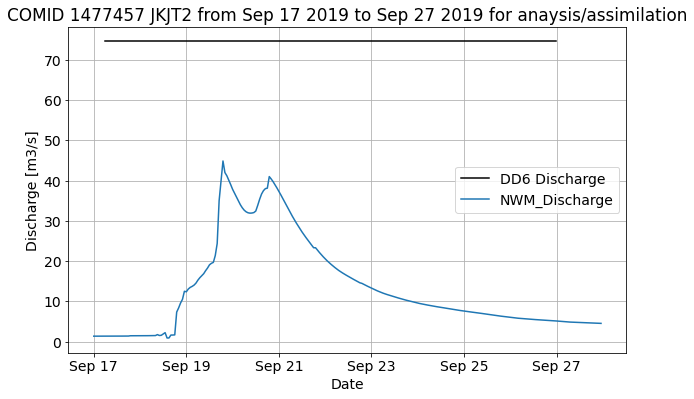

<Figure size 432x288 with 0 Axes>

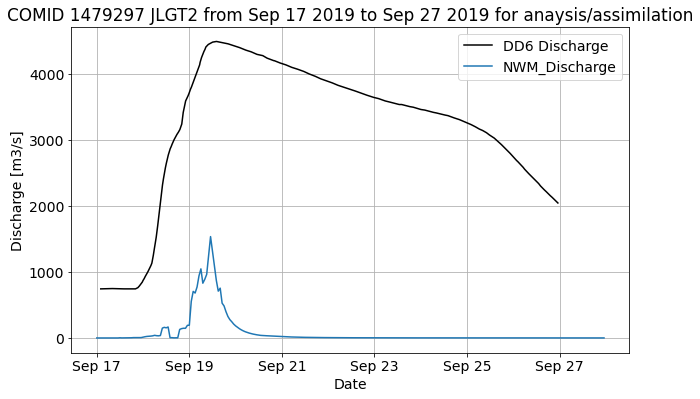

<Figure size 432x288 with 0 Axes>

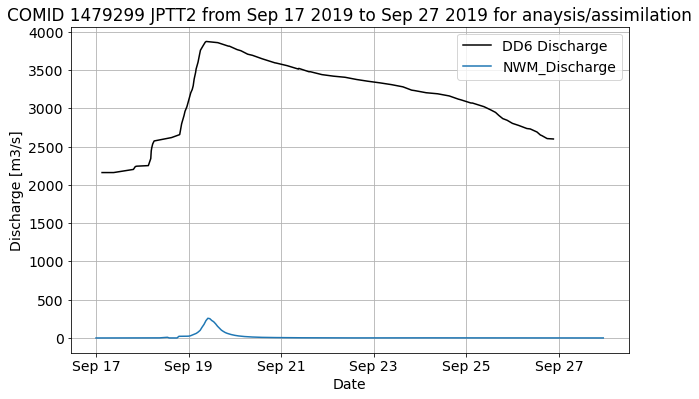

<Figure size 432x288 with 0 Axes>

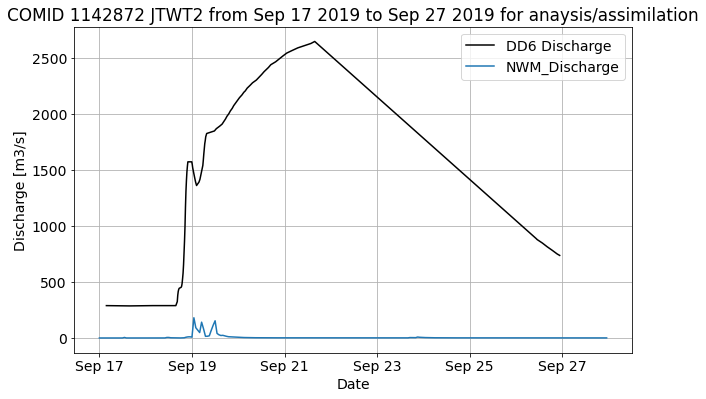

<Figure size 432x288 with 0 Axes>

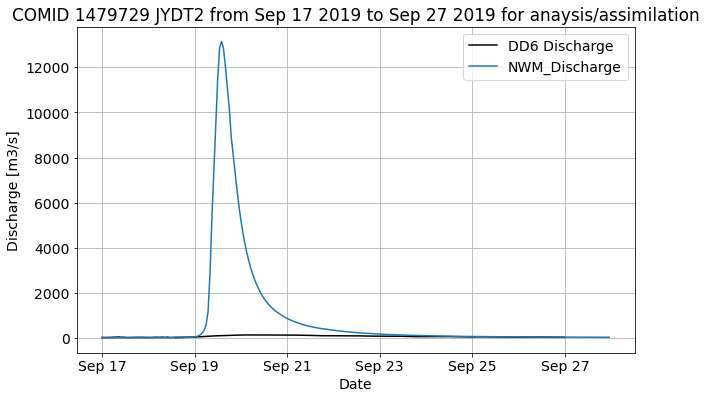

<Figure size 432x288 with 0 Axes>

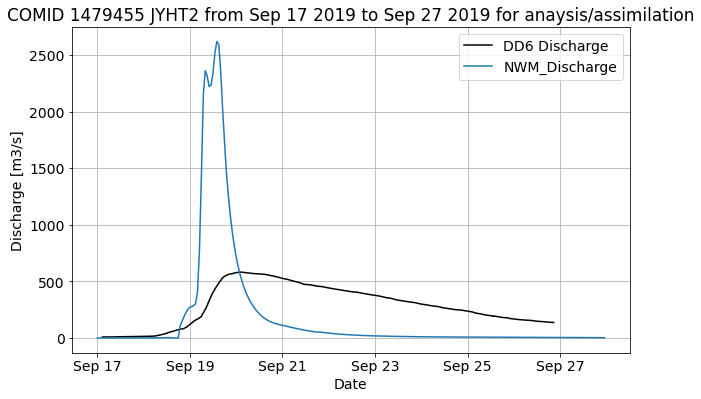

<Figure size 432x288 with 0 Axes>

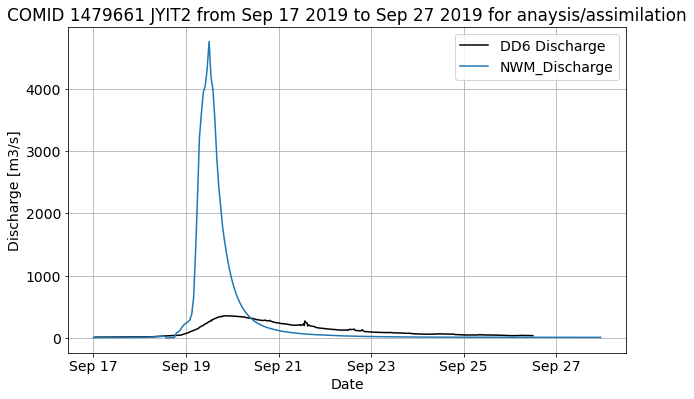

<Figure size 432x288 with 0 Axes>

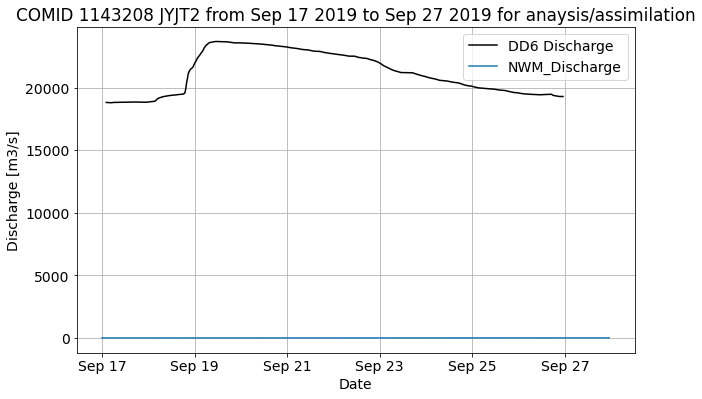

<Figure size 432x288 with 0 Axes>

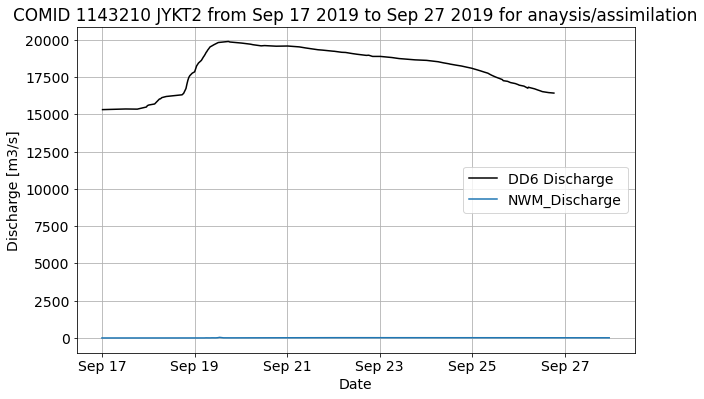

<Figure size 432x288 with 0 Axes>

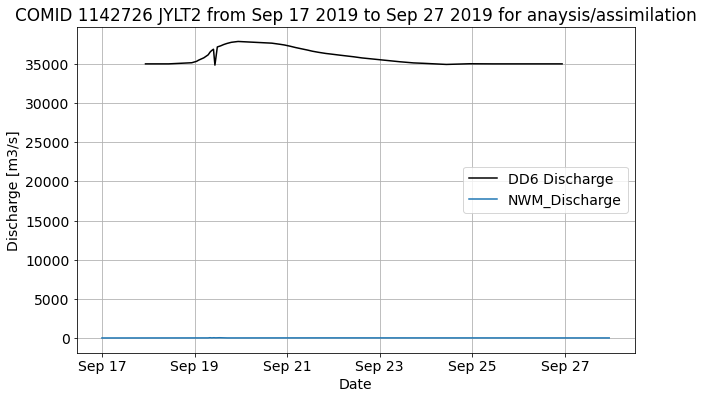

<Figure size 432x288 with 0 Axes>

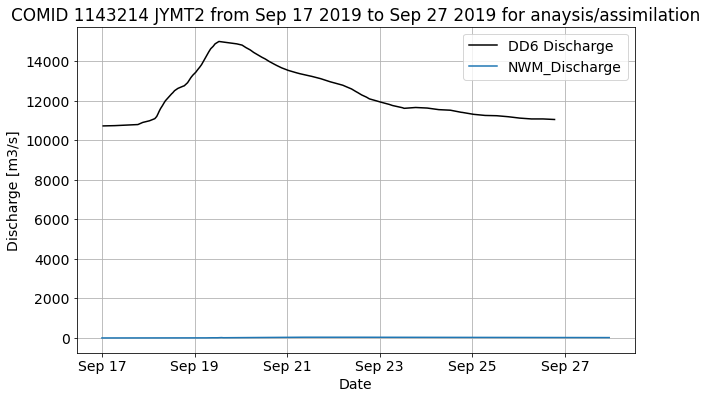

<Figure size 432x288 with 0 Axes>

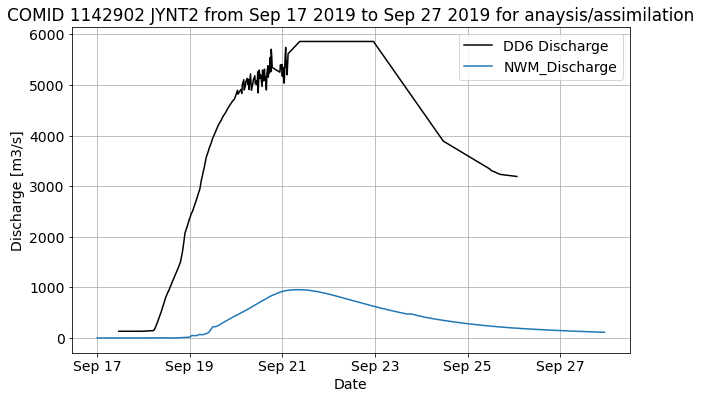

<Figure size 432x288 with 0 Axes>

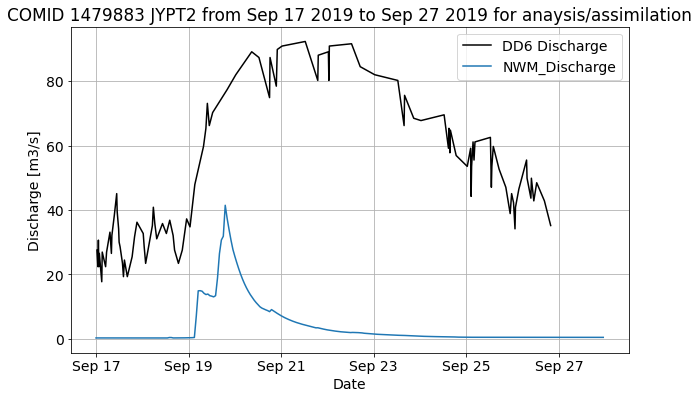

<Figure size 432x288 with 0 Axes>

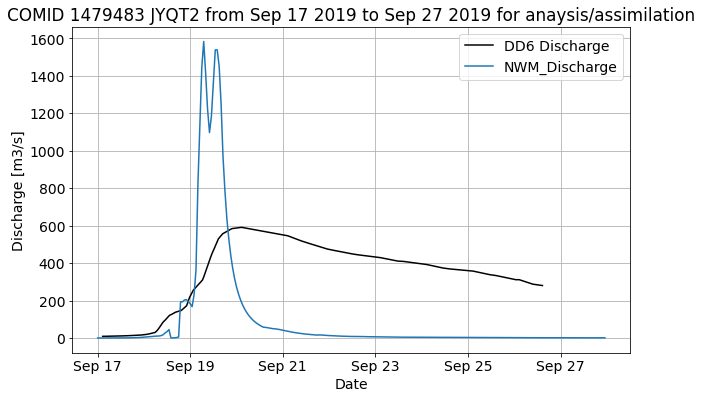

<Figure size 432x288 with 0 Axes>

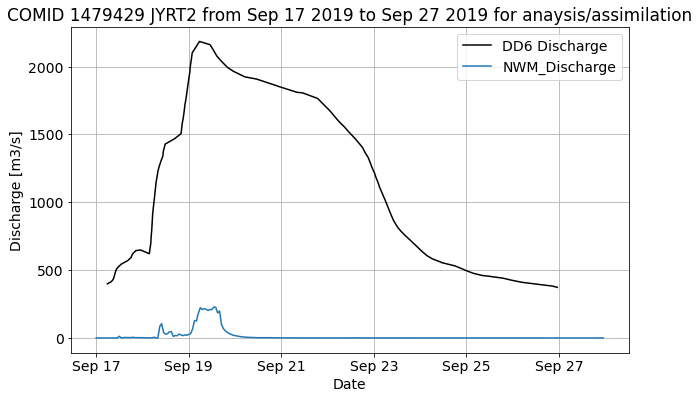

<Figure size 432x288 with 0 Axes>

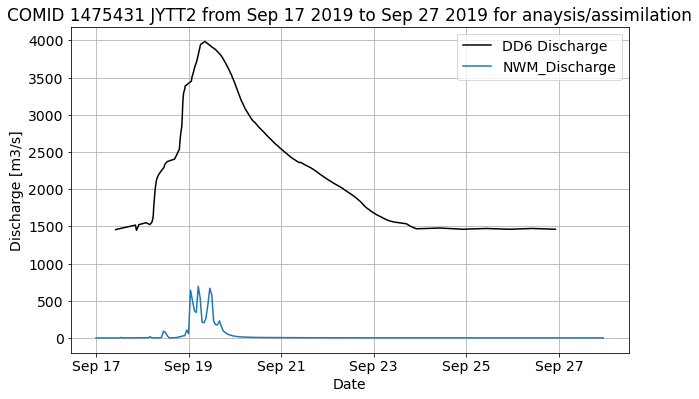

<Figure size 432x288 with 0 Axes>

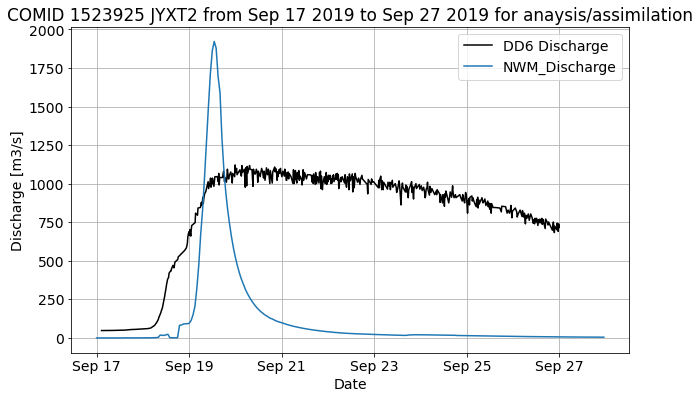

<Figure size 432x288 with 0 Axes>

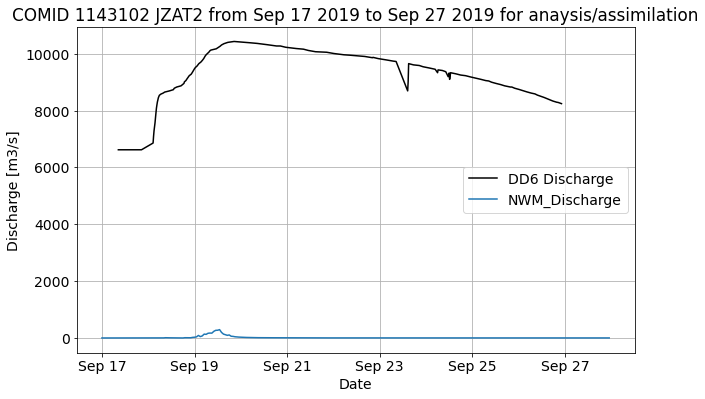

<Figure size 432x288 with 0 Axes>

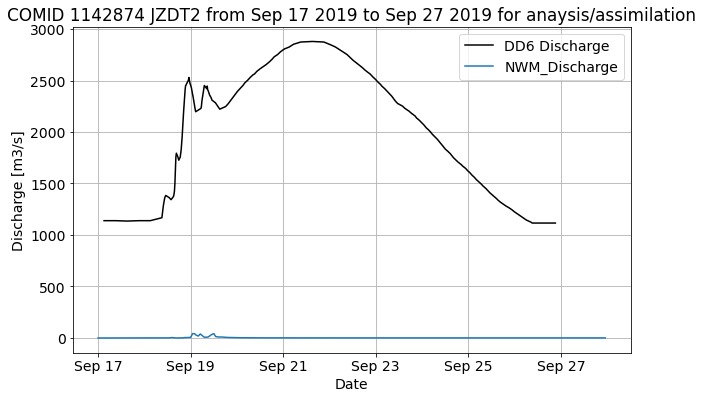

<Figure size 432x288 with 0 Axes>

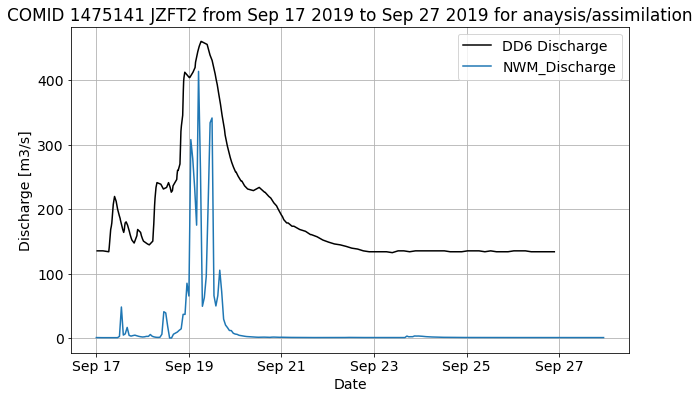

<Figure size 432x288 with 0 Axes>

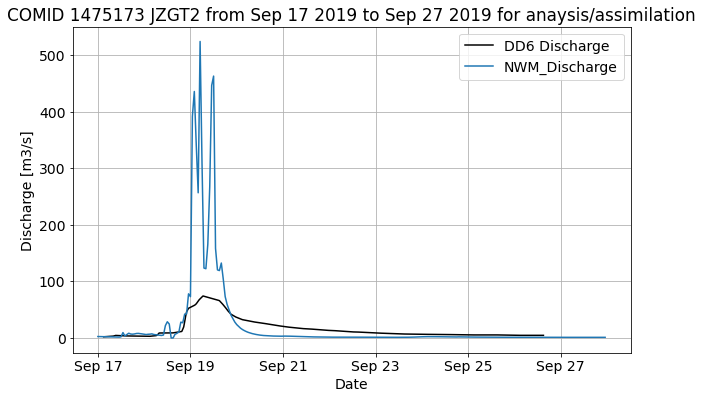

<Figure size 432x288 with 0 Axes>

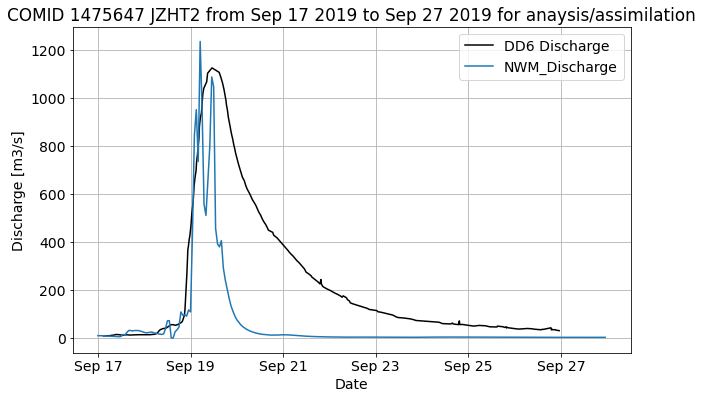

<Figure size 432x288 with 0 Axes>

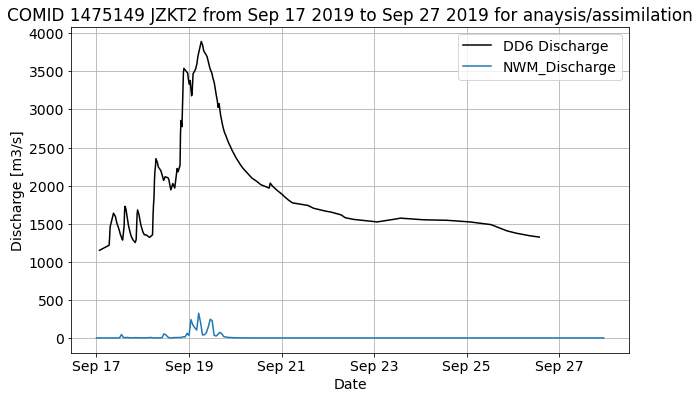

<Figure size 432x288 with 0 Axes>

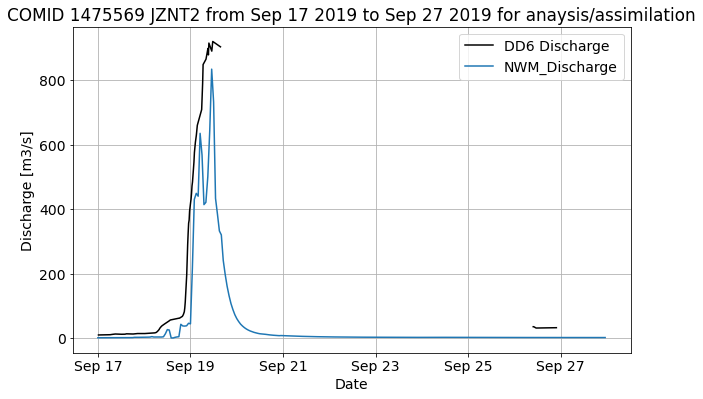

<Figure size 432x288 with 0 Axes>

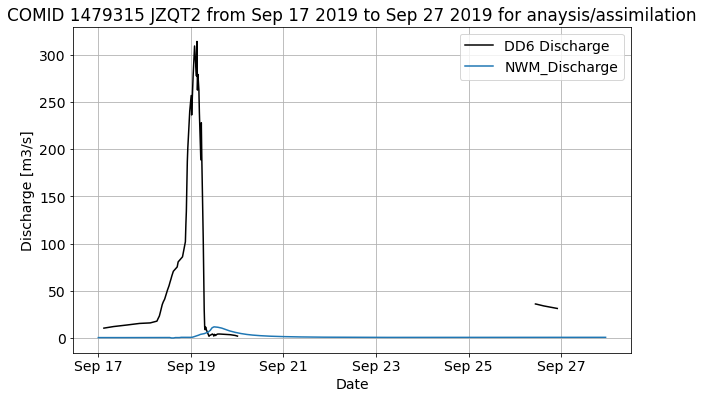

<Figure size 432x288 with 0 Axes>

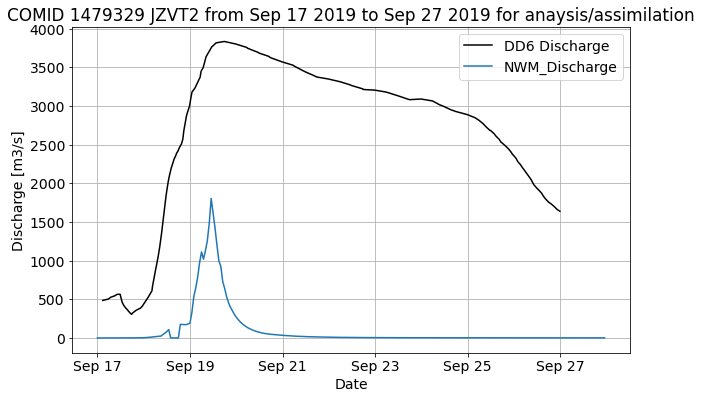

<Figure size 432x288 with 0 Axes>

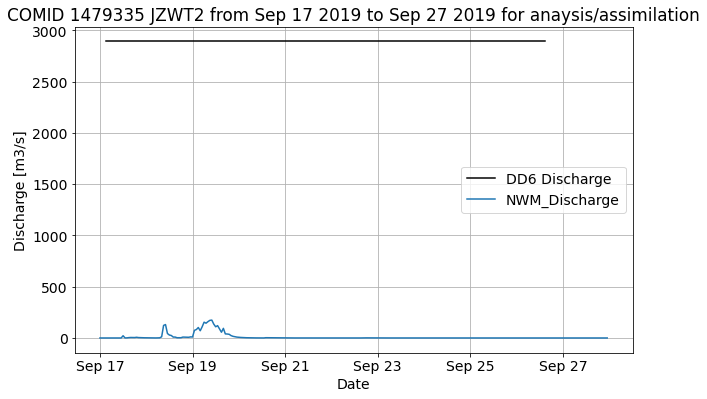

<Figure size 432x288 with 0 Axes>

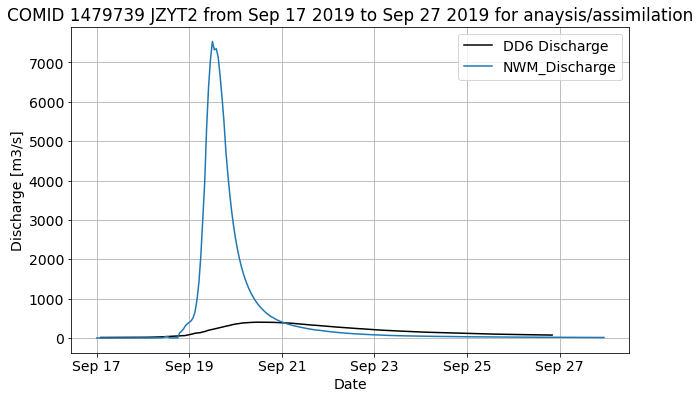

In [27]:
# Interpolation to convert DD6 stage to discharge

from scipy.interpolate import interp1d
import matplotlib.dates as mdates


# Get the interpolated discharge from rating curves

index = comid_stn['Index']
gauge_name_all = comid_stn['station']


for i in index:
  comid = comid_all[i]
  gauge_name = gauge_name_all[i]
  stage_difference = pd.read_csv('D:/Sujana/Project/all_in_one/DD6/DD6_'+gauge_name+'.csv')
  stage_difference['dd6_stage_m'] = stage_difference['value'] / 3.28084
  stage_difference['interp_dd6_discharge'] = interpolate_discharge(stage_difference, rating_curves)
  stage_difference['timestamp']=pd.to_datetime(stage_difference['timestamp'])

  # drop meaningless columns
# discharge_difference = discharge_difference.drop(columns=['Unnamed: 0'])

    # drop duplicate rows
# discharge_difference = discharge_difference.drop_duplicates()

    # save as csv
  stage_difference.to_csv(r'D:/Sujana/Project/all_in_one/DD6_stage_with_discharge/an/'+gauge_name+' with_discharge.csv', index=False)


  discharge_difference = pd.read_csv('D:/Sujana/Project/NWM_discharge/discharge_'+str(comid)+'.csv')
  discharge_difference['Time']=pd.to_datetime(discharge_difference['Time'])

  




  # Plotting discharge-time series
  plt.figure(facecolor='white')
  plt.rc('font', size=14)
  fig, ax = plt.subplots(figsize=(10, 6))
  # time = discharge_difference['Time']
  # print (time)
  ax.plot(stage_difference['timestamp'], stage_difference['interp_dd6_discharge'],color='k', label='DD6 Discharge')
  ax.plot(discharge_difference['Time'], discharge_difference['Discharge_NWM'],color='tab:blue', label='NWM_Discharge')
  


  ax.set(xlabel='Date',
        ylabel='Discharge [m3/s]',
        title=f'COMID {comid} {gauge_name} from ' \
        f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
        f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for anaysis/assimilation')
  date_form = DateFormatter("%b %d")
  ax.xaxis.set_major_formatter(date_form)
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
  ax.legend()
  ax.grid(True)
  plt.savefig('D:/Sujana/Project/all_in_one/Graphs/save/'+ str (comid) + gauge_name +'_Discharge_graph_analysis.jpg')


In [28]:
# #Renaming the filename for DD6 gauges
# import json                                                         # this module is used to read json files
# import os                                                           # this modules is used to get all the names of your json files and rename them

# folder_path = "D:/Sujana/Project/Data_final"                         # you specifie the folder conatining your json files

# files = os.listdir(folder_path)                                     # you all the files names in the specified folder

# for file in files:                                                  # for each file in the folder
#     with open(f"{folder_path}/{file}", "r") as f:                   # you open the file
#         json_file = json.load(f) 
#                                      # you get the infos stored in the json file as a dictionary
#     b = json_file['locations'][0]['key']
    
#     filename = b+".json"
#     os.rename(f"{folder_path}/{file}",f"{folder_path}/{filename}")
   